# Simple ps-files visualization

Demonstrate plotting of ps-files with simple shapes. The files with suffix "-wv.ps" represent files without generated void cells (without voids).
This files are plotted some lines as red dash-lines. We need to represent them as solid lines.


In [1]:
import os
import sys

print(sys.version, "at", sys.prefix)

3.13.11 (main, Dec  5 2025, 20:22:32) [Clang 21.1.4 ] at /home/dvp/dev/mckit-meshes/.venv


In [2]:
from enum import IntEnum

In [3]:
from pathlib import Path

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import colormaps as cm
from matplotlib import colors, ticker

In [5]:
from mckit_meshes.plot import Page, load_plotm_file, plot_ps_page

In [6]:
%matplotlib inline

See matplotlib [styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

In [7]:
# plt.style.available

In [8]:
DEBUG_PLOT = True

class PlotTarget(IntEnum):
    paper = 0,
    presentation = 1,
    jupyter = 2
    

PLOT_TARGET: PlotTarget = PlotTarget.paper



In [9]:
# font = {
#     "weight": "normal",
#     "size": 12,
# }
# plt.rc("font", **font)
# plt.rcParams["mathtext.default"] = "regular"
PUBLICATION_DPI = 1200 #300  # default resolution for publications images
# A4_WIDTH = 21  # cm
# A4_HEIGHT = 29.7
# A4_WIDTH_WITHOUT_MARGIN = A4_WIDTH - 4
# INCH = 2.54  # cm
# FIG_WIDTH = 16 / INCH
# FIG_HEIGHT = FIG_WIDTH / 1.33
# FIG_SIZE = (FIG_WIDTH, FIG_HEIGHT)
FIG_SIZE = (6.4, 4)
# FIG_WIDTH = int(
#     10.6 / INCH
# )  # Optimal for full page witdh graphs, for 1 column graph in 2 column publications use 8cm.
# FIG_HEIGHT = FIG_WIDTH
# plt.rcParams["figure.figsize"] = (FIG_WIDTH, FIG_HEIGHT)
# plt.style.use("petroff10")
# plt.rc("grid", color="gray", linestyle="solid")
# plt.rc("xtick", direction="out", color="gray")
# plt.rc("ytick", direction="out", color="gray")
# plt.style.use(
#     [
#         "fivethirtyeight"
#     ]
# )
# background = '#f0f0f0' # - default for fivethirtyeight style
# this will plot gray background in Jupyter
# on saving img to png file the background is transparent

my_params = {
    'figure.dpi': int(os.getenv("JUPYTER_DPI", 88)),  # 88 - optimal for ViewSonic 32" screen, WYSWYG for 16 cm figure width
    "mathtext.default": "regular",
    "figure.figsize": FIG_SIZE,
    # 'axes.edgecolor': background,
    # 'axes.facecolor': background,
    # "figure.facecolor": background,
    "savefig.dpi": PUBLICATION_DPI,
    "savefig.transparent": True,
    "savefig.bbox": "tight",
}
plt.rcParams.update(my_params)

markers = "sov^*d"
linestyles = ["-", "--", ":", "-."]

In [10]:
DATA_ROOT = Path("../../tests/data/plot")
assert DATA_ROOT.is_dir()

In [11]:
ps_files = list(DATA_ROOT.glob("*.ps"))
assert ps_files
ps_files

[PosixPath('../../tests/data/plot/cube-wv.ps'),
 PosixPath('../../tests/data/plot/cube.ps'),
 PosixPath('../../tests/data/plot/sphere.ps'),
 PosixPath('../../tests/data/plot/sphere-wv.ps'),
 PosixPath('../../tests/data/plot/cube-tilted.ps'),
 PosixPath('../../tests/data/plot/cube-tilted-wv.ps')]

In [12]:
pages = { p.stem: load_plotm_file(p)[0] for p in ps_files }
len(pages)

6

In [13]:
p = pages["cube"]
dir(p)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__replace__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'basis',
 'convert_to_meters',
 'date',
 'extent',
 'get_2d_origin',
 'is_x_plane',
 'is_y_plane',
 'is_z_plane',
 'lines',
 'origin',
 'probid',
 'rescaled',
 'title']

In [14]:
def get_extent(p: Page, /, zoom: float = 1.0) -> tuple[float, float, float, float]:
    return zoom * (p.origin[0] - p.extent[0]), zoom * (p.origin[0] + p.extent[0]), zoom * (p.origin[1] - p.extent[1]), zoom*(p.origin[1] + p.extent[1])

In [15]:
def plot_page(ax, stem:str, /, zoom: float = 1.0) -> None:
    p = pages[stem]
    xmin, xmax, ymin, ymax = get_extent(p, zoom)
    ax.set_aspect("equal")
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    plot_ps_page(ax, p)
    sns.despine(ax=ax, left=True, bottom=True)
    # axes.get_xaxis().set_visible(False) 
    # axes.get_yaxis().set_visible(False) 
    ax.set_xticks([])
    ax.set_yticks([])    
    # plt.savefig((NPZ_DIR / "total-neutron-flux-pz=50").with_suffix(".png"), dpi=PUBLICATION_DPI, bbox_inches="tight", transparent=True, metadata={"Title": "Total neutron flux at PZ=50"})

In [16]:
sns.set_theme(context='notebook', style="white", palette='colorblind')

In [17]:
def scan_stems():
    sorted_stems = sorted(s for s in pages if not s.endswith("-wv"))
    for s in sorted_stems:
        yield s

sorted_stems = [s for s in scan_stems()]
sorted_stems

['cube', 'cube-tilted', 'sphere']

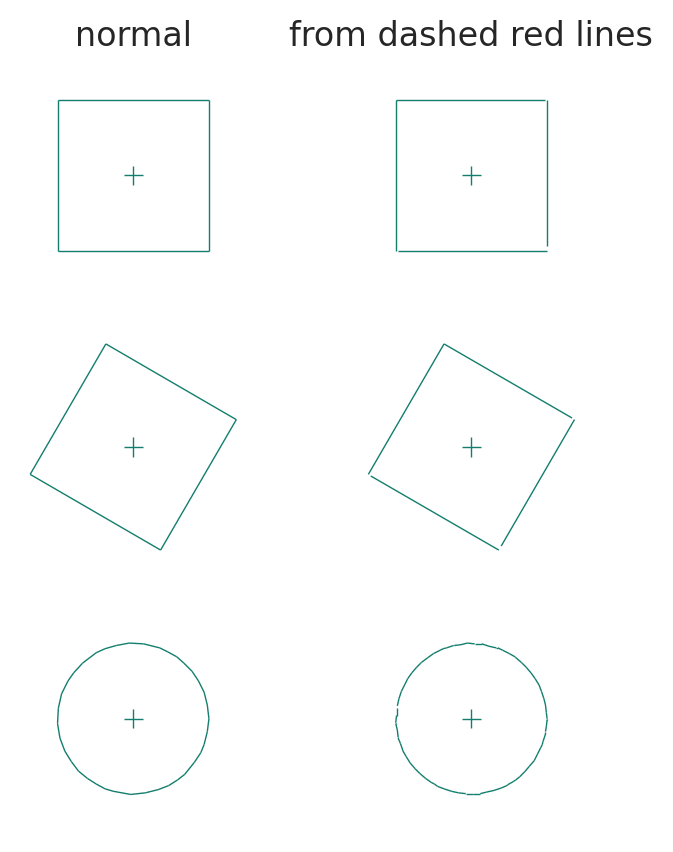

In [18]:
fig = plt.figure(figsize=(4,5), dpi=200)
rows = len(sorted_stems)
cols = 2
axes = fig.subplots(rows, cols, squeeze=True)
for i, stem in enumerate(sorted_stems):
    ax = axes[i][0]
    if i == 0:
        ax.set_title("normal")
    plot_page(ax, stem, zoom = 0.15)
    ax = axes[i][1]
    if i == 0:
        ax.set_title("from dashed red lines")
    plot_page(ax, stem + "-wv", zoom = 0.15)
plt.show()